In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [2]:
cf10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


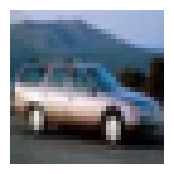

In [4]:
img = train_images[4]
plt.figure(figsize=(2,2))
plt.imshow(img, cmap=plt.cm.binary)
plt.axis("off")
plt.show()

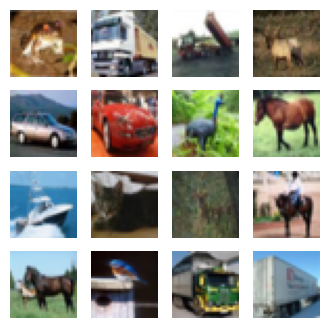

In [5]:
m=4
k=0
plt.figure(figsize=(4,4))
for i in range(0,m):
    for j in range(0,m):
        plt.subplot2grid((m,m),(i,j))
        plt.imshow(train_images[k])
        k=k+1
        plt.axis("off")
plt.show()

In [6]:
train_images = train_images / 255
test_images = test_images / 255

In [7]:
def modelVGG16():
    base_model = keras.applications.VGG16(
        include_top=False,
        weights='imagenet',
        input_shape=(32, 32, 3)
    )

    for layer in base_model.layers:
        layer.trainable = False

    model = keras.Sequential([
        base_model,
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation='softmax')
    ], name="VGG16-CF10")

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

model = modelVGG16()
model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "VGG16-CF10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                         

In [8]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=35, shuffle=True)


Epoch 1/35
391/391 [==============================] - 13s 18ms/step - loss: 1.7136 - accuracy: 0.3902
Epoch 2/35
391/391 [==============================] - 6s 16ms/step - loss: 1.4280 - accuracy: 0.5034
Epoch 3/35
391/391 [==============================] - 6s 15ms/step - loss: 1.3533 - accuracy: 0.5298
Epoch 4/35
391/391 [==============================] - 6s 16ms/step - loss: 1.3107 - accuracy: 0.5486
Epoch 5/35
391/391 [==============================] - 6s 15ms/step - loss: 1.2726 - accuracy: 0.5623
Epoch 6/35
391/391 [==============================] - 6s 15ms/step - loss: 1.2529 - accuracy: 0.5699
Epoch 7/35
391/391 [==============================] - 6s 15ms/step - loss: 1.2353 - accuracy: 0.5747
Epoch 8/35
391/391 [==============================] - 6s 15ms/step - loss: 1.2143 - accuracy: 0.5837
Epoch 9/35
391/391 [==============================] - 6s 15ms/step - loss: 1.2007 - accuracy: 0.5875
Epoch 10/35
391/391 [==============================] - 6s 16ms/step - loss: 1.1908 - accur

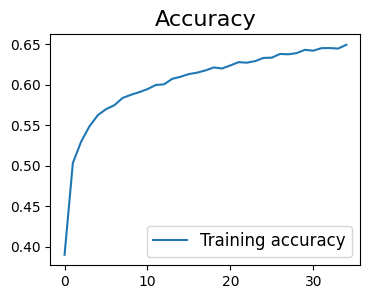

<Figure size 640x480 with 0 Axes>

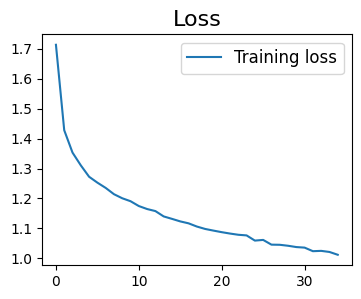

In [9]:
accuracy = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(4,3))
plt.plot(accuracy, label='Training accuracy')
plt.title('Accuracy', fontsize=16)
plt.legend(fontsize=12)

plt.figure()

plt.figure(figsize=(4,3))
plt.plot(loss, label='Training loss')
plt.title('Loss', fontsize=16)
plt.legend(fontsize=12)

In [10]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print("Loss : " + str(val_loss*100))
print("Accuracy : "+ str(val_acc*100))

313/313 [==============================] - 5s 10ms/step - loss: 1.1012 - accuracy: 0.6216
Loss : 110.1237416267395
Accuracy : 62.15999722480774


313/313 [==============================] - 2s 7ms/step


Text(58.222222222222214, 0.5, 'Truth')

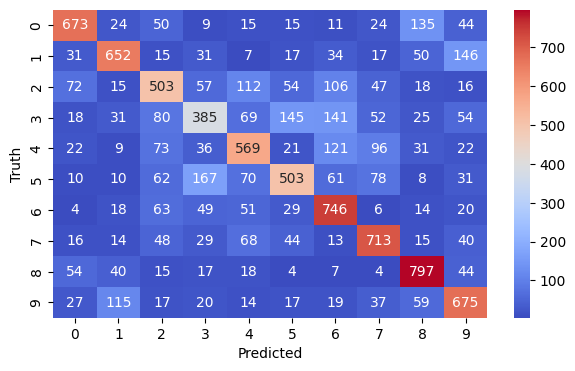

In [11]:
preds_labels = model.predict(test_images)
predicted_labels = [np.argmax(i) for i in preds_labels]
cm = tf.math.confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize = (7,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [12]:
model.save('cifar10_vgg16_with_top.keras')


In [13]:
model = tf.keras.models.load_model('cifar10_vgg16_with_top.keras')


In [14]:
import cv2 as cv
CATEGORIES = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Truck','Ship' ]
def image(path):
    img = cv.imread(path)
    new_arr = cv.resize(img, (32, 32))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(1, 32, 32, 3)
    return new_arr


In [16]:
prediction = model.predict([image('car.jpg')])
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 19ms/step
Automobile
